## 1. Importing Data

In [2]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv(os.path.join("../", "data", "kc_house_data.csv"))
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## 2. Exploring Data

In [4]:
#Setting target column to the left and displaying columns
df = df.set_index('price').reset_index()
df.columns.to_list()

['price',
 'id',
 'date',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [ ]:
#Checking for duplicates with unique identifier

In [5]:
#Inspecting dataset for types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
price            21597 non-null float64
id               21597 non-null int64
date             21597 non-null object
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
#Checking for any null values
df.isna().sum()

price               0
id                  0
date                0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
df.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


***Observations***
1. 'waterfront', 'view', 'yr_renovated' have missing values. 
2. 'date' and 'sqft_basement' are considered as objects.
3. 33 bedrooms looks odd.
4. Categorical variables: 'waterfront', 'view', 'condition', 'grade', and 'zipcode' as far as I could tell right now

### Cleaning Data

In [8]:
#droping null rows in view
df.dropna(subset=['view'],inplace=True)

In [9]:
df.bedrooms.value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [10]:
#remove 33 bedrooms
df = df[df.bedrooms != 33]

In [11]:
df.sqft_living.value_counts()

1300    138
1400    134
1440    133
1010    129
1800    129
       ... 
4970      1
2905      1
2793      1
4810      1
1975      1
Name: sqft_living, Length: 1033, dtype: int64

In [12]:
df.sqft_lot.value_counts()

5000     357
6000     289
4000     251
7200     220
4800     119
        ... 
35752      1
937        1
9133       1
64438      1
14321      1
Name: sqft_lot, Length: 9760, dtype: int64

In [13]:
df.floors.value_counts()

1.0    10642
2.0     8211
1.5     1903
3.0      611
2.5      159
3.5        7
Name: floors, dtype: int64

In [14]:
df.waterfront.value_counts()

0.0    19018
1.0      145
Name: waterfront, dtype: int64

In [15]:
df.view.value_counts()

0.0    19421
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [16]:
df.condition.value_counts()

3    13981
4     5657
5     1696
2      170
1       29
Name: condition, dtype: int64

In [17]:
df.grade.value_counts()

7     8947
8     6053
9     2604
6     2031
10    1130
11     397
5      242
12      88
4       27
13      13
3        1
Name: grade, dtype: int64

In [18]:
df.sqft_above.value_counts()

1300    212
1010    209
1200    204
1220    191
1140    183
       ... 
2665      1
2601      1
440       1
2473      1
1975      1
Name: sqft_above, Length: 942, dtype: int64

In [19]:
df.sqft_basement.value_counts()

0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
3260.0        1
374.0         1
768.0         1
602.0         1
3500.0        1
Name: sqft_basement, Length: 302, dtype: int64

In [20]:
#replacing ? to 0s
df['sqft_basement'] = df['sqft_basement'].str.replace('?', '0')
df.sqft_basement.value_counts()

0.0       12798
0           452
600.0       216
500.0       209
700.0       207
          ...  
3260.0        1
374.0         1
768.0         1
602.0         1
3500.0        1
Name: sqft_basement, Length: 302, dtype: int64

In [21]:
df[["sqft_basement"]] = df[["sqft_basement"]].apply(pd.to_numeric)

In [22]:
df.yr_built.value_counts()

2014    558
2006    453
2005    448
2004    430
2003    419
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [23]:
df.yr_renovated.value_counts()

0.0       16960
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [24]:
df.zipcode.value_counts()

98103    600
98038    586
98115    580
98052    573
98117    553
        ... 
98102    104
98010    100
98024     79
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [25]:
df.lat.value_counts()

47.6624    17
47.5491    17
47.6846    17
47.5322    17
47.6886    16
           ..
47.3024     1
47.2581     1
47.2074     1
47.4256     1
47.2715     1
Name: lat, Length: 5029, dtype: int64

In [26]:
df.long.value_counts()

-122.290    115
-122.300    109
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.467      1
-121.403      1
-121.726      1
-121.804      1
-121.893      1
Name: long, Length: 750, dtype: int64

In [27]:
df.sqft_living15.value_counts()

1540    197
1440    195
1560    191
1500    179
1460    169
       ... 
4890      1
2873      1
952       1
3193      1
2049      1
Name: sqft_living15, Length: 776, dtype: int64

In [28]:
df.sqft_lot15.value_counts()

5000      426
4000      356
6000      288
7200      210
4800      145
         ... 
8989        1
871200      1
809         1
4907        1
6147        1
Name: sqft_lot15, Length: 8663, dtype: int64

In [45]:
#dropping columns
df.drop(['id', 'waterfront','yr_renovated'], axis=1, inplace=True)

### Data visualization

#### Visualizing each variables and targeted value

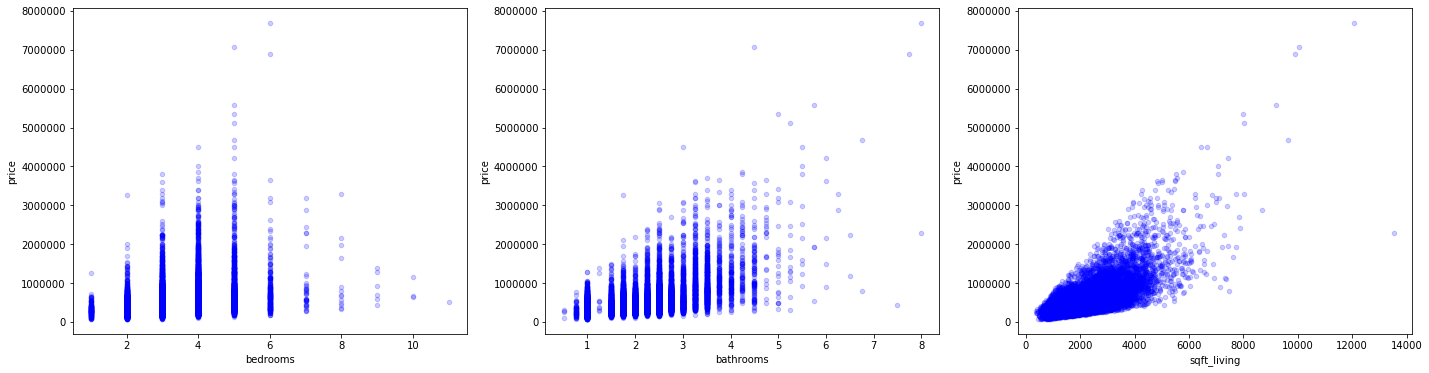

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b')

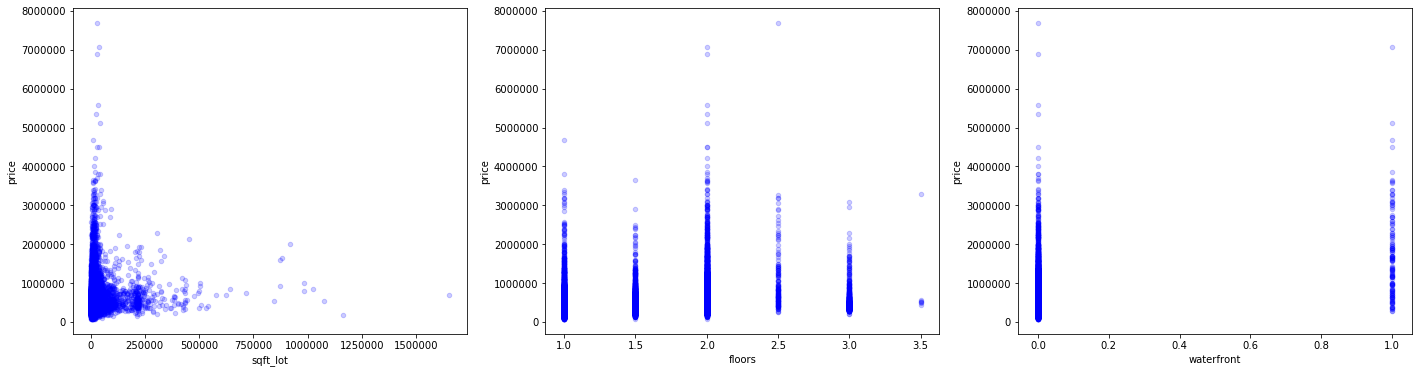

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
for xcol, ax in zip(['sqft_lot', 'floors', 'waterfront'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b')

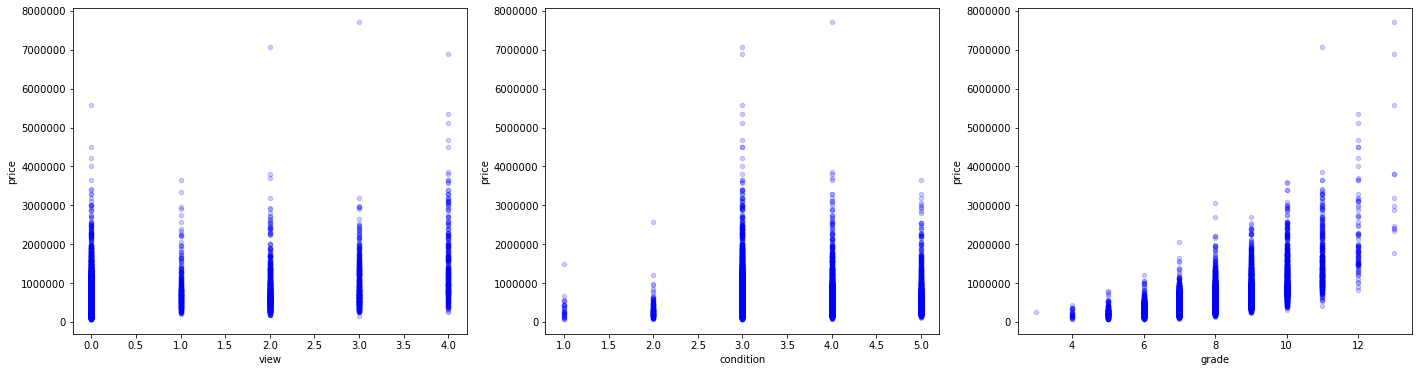

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
for xcol, ax in zip(['view', 'condition', 'grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b')

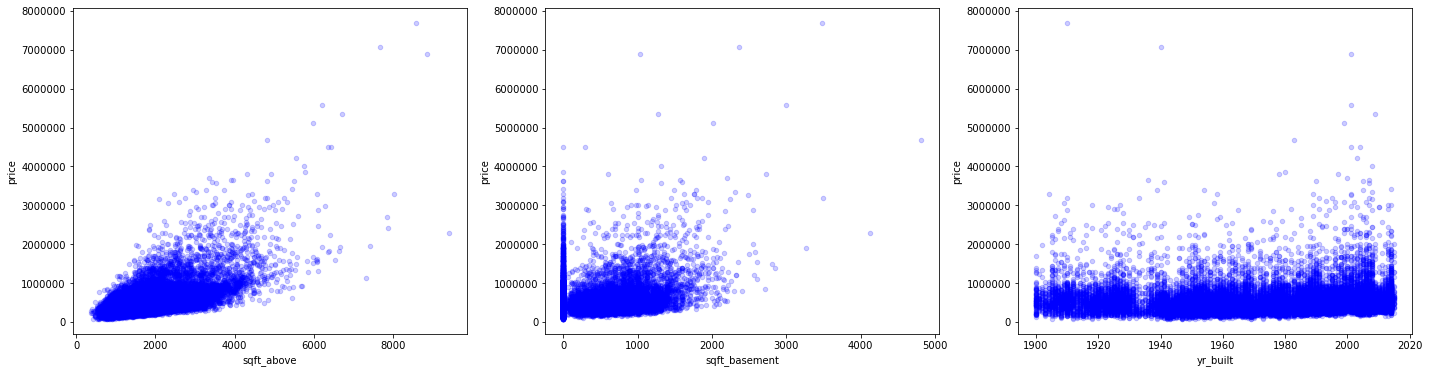

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
for xcol, ax in zip([ 'sqft_above', 'sqft_basement', 'yr_built'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b')

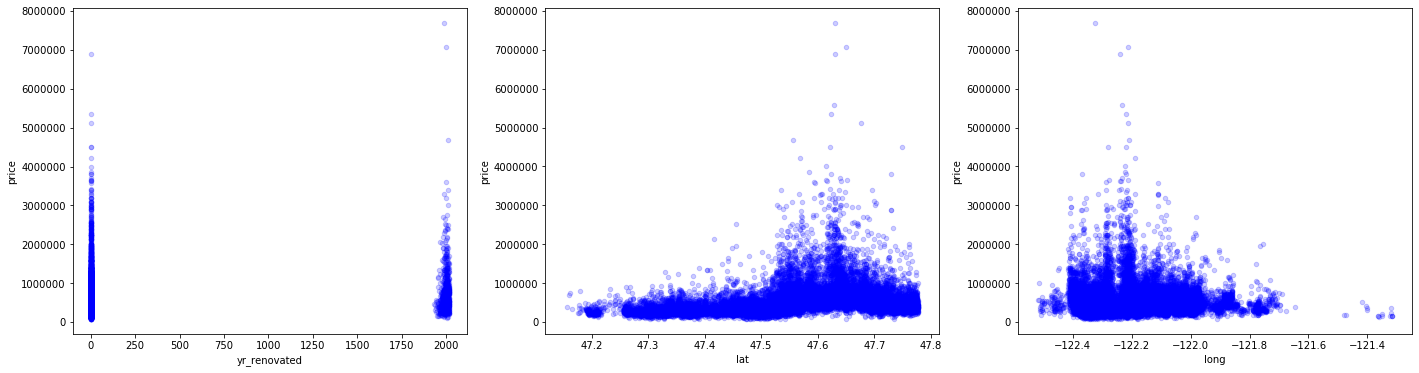

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
for xcol, ax in zip(['yr_renovated', 'lat', 'long'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b')

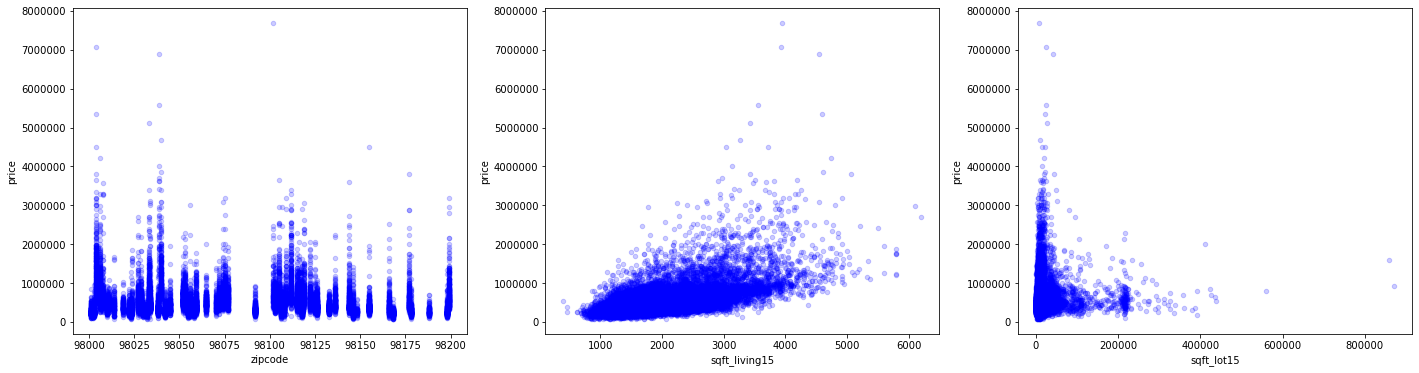

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,6))
for xcol, ax in zip(['zipcode', 'sqft_living15', 'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.2, color='b')

***Observations:***
These following variables are categorical:
'bedrooms', 'bathrooms' 'floors', 'waterfront', 'view', 'condition', 'grade', and 'zipcode'

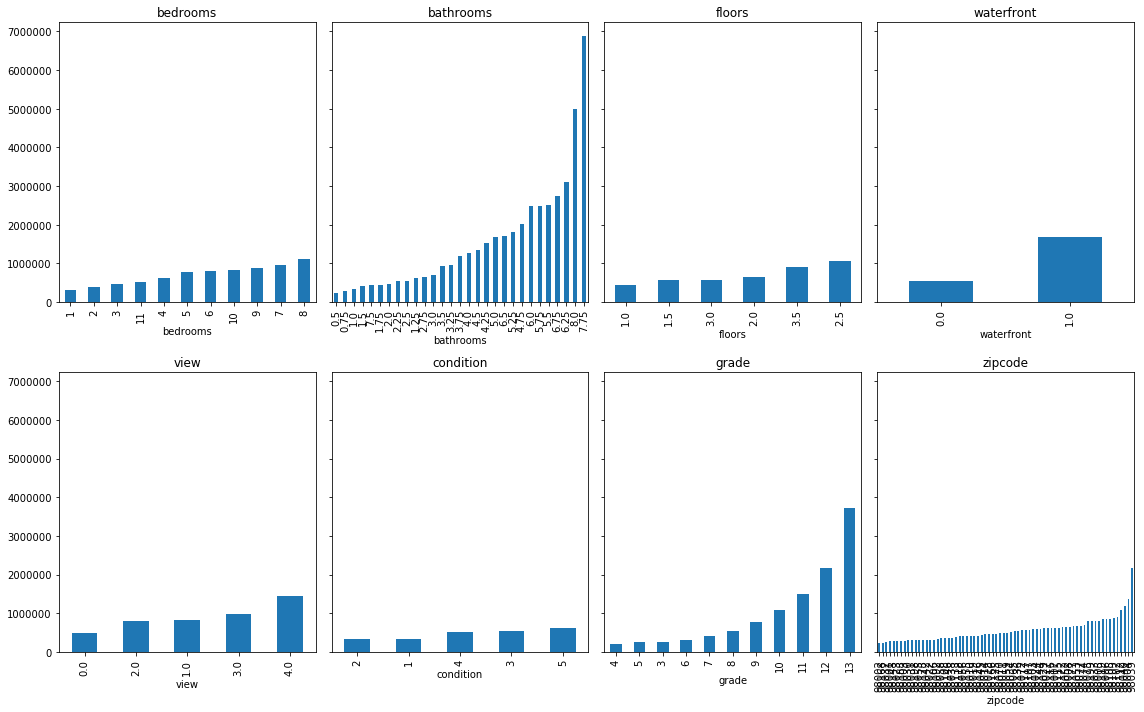

In [39]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,10), sharey=True)

categoricals = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode']

for col, ax in zip(categoricals, axes.flatten()):
    (df.groupby(col) # group values together by column of interest
        .mean()['price'] # take the mean of the saleprice for each group
         .sort_values() # sort the groups in ascending order
         .plot
         .bar(ax=ax)) # create a bar graph on the ax
    
    ax.set_title(col) # Make the title the name of the column
    
fig.tight_layout()

### Correlation

In [47]:
corr = df.corr()

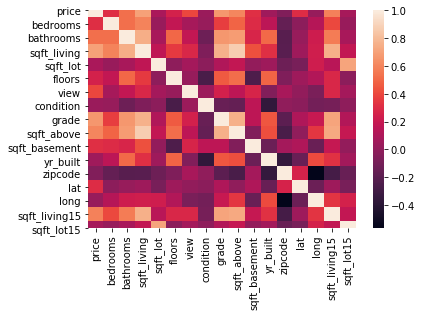

In [48]:
sns.heatmap(corr);

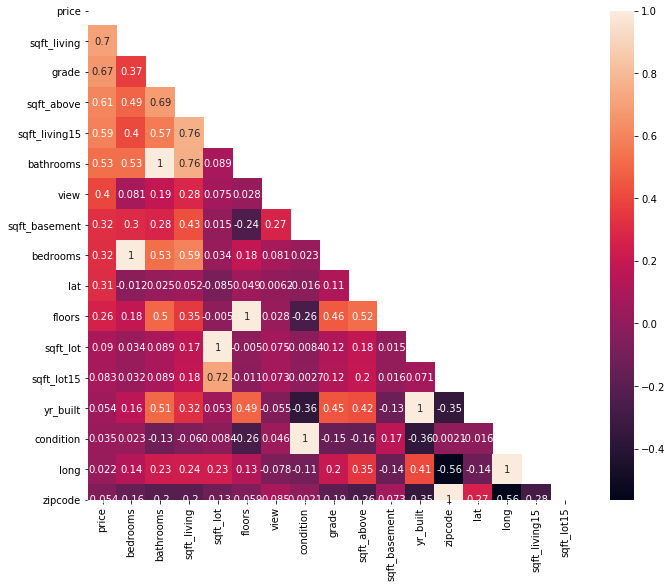

In [55]:
corr = corr.sort_values(by='price', ascending=False)
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, ax=ax1, annot=True);

In [61]:
abs(df.corr()) > 0.75

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,True,True,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False,False


In [69]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [63]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876554
"(sqft_living, grade)",0.762395
"(sqft_living, sqft_living15)",0.756206
"(sqft_above, grade)",0.755973
"(sqft_living, bathrooms)",0.755274


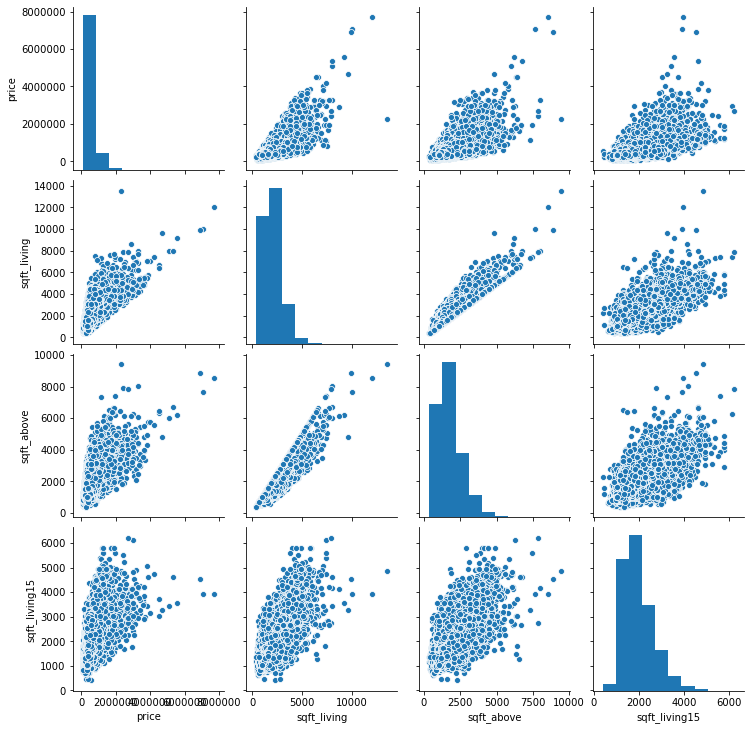

In [54]:
#using the heatmap above, selecting highly positively correlated with price to create pairplot. Only using continuou
positively_correlated_cols = ['price', 'sqft_living', 'sqft_above', 'sqft_living15']
positively_correlated_df = df[positively_correlated_cols]
sns.pairplot(positively_correlated_df);

### First Simple Model

In [78]:
fsm_df = df[["sqft_living", "price"]].copy()
fsm_df.dropna(inplace=True)

KeyError: "None of [Index(['sqft_living', 'price'], dtype='object')] are in the [columns]"

In [76]:
fsm = ols(formula="price ~ sqft_living", data=fsm_df)
fsm_results = fsm.fit()

In [79]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                 2.087e+04
Date:                Fri, 30 Apr 2021   Prob (F-statistic):               0.00
Time:                        16:29:15   Log-Likelihood:            -2.9911e+05
No. Observations:               21533   AIC:                         5.982e+05
Df Residuals:                   21531   BIC:                         5.982e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.218e+04   4404.621     -9.575      0.000   -5.08e+04   -3.35e+04
sqft_living   279.9379      1.938    144.475      0.000     276.140     283.736
==============================================================================
Omnibus:                    14581.827   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           516123.571
Skew:                           2.781   Prob(JB):                         0.00
Kurtosis:                      26.331   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""